
# hierarchical

In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [35]:
Crime=pd.read_csv("crime_data.csv")

In [36]:
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [37]:
Crime.drop(Crime.columns[[0]], axis = 1, inplace = True)

In [39]:
Crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


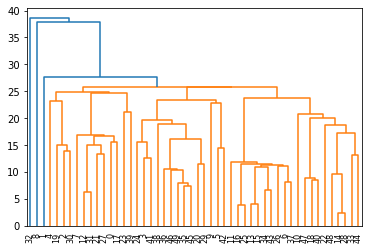

In [40]:
dendrogram= sch.dendrogram(sch.linkage(Crime, method='single'))

In [41]:
# Normalization 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [42]:
df_norm = norm_func(Crime.iloc[:,1:])

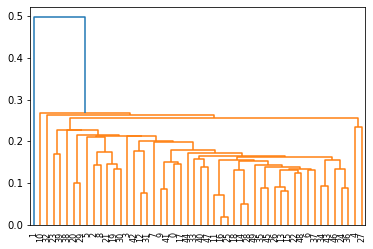

In [44]:
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='single'))

In [46]:
# Create  cluster
hc =AgglomerativeClustering(n_clusters=4, affinity ='euclidean', linkage='single')

In [47]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [48]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [51]:
final_data=pd.concat([Clusters,Crime])
final_data

,Clusters,Murder,Assault,UrbanPop,Rape
0,0.0,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
45,NaN,8.5,156.0,63.0,20.7
46,NaN,4.0,145.0,73.0,26.2
47,NaN,5.7,81.0,39.0,9.3
48,NaN,2.6,53.0,66.0,10.8


In [53]:
frames = ['Clusters','Crime']
final_data=pd.concat([Clusters,Crime], axis=1)
final_data

,Clusters,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,3,10.0,263,48,44.5
2,0,8.1,294,80,31.0
3,0,8.8,190,50,19.5
4,0,9.0,276,91,40.6
5,0,7.9,204,78,38.7
6,0,3.3,110,77,11.1
7,0,5.9,238,72,15.8
8,0,15.4,335,80,31.9
9,0,17.4,211,60,25.8


In [54]:
final_data.groupby('Clusters').mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,7.682979,167.914894,65.978723,20.868085
1,13.000000,337.000000,45.000000,16.100000
2,5.300000,46.000000,83.000000,20.200000
3,10.000000,263.000000,48.000000,44.500000


In [56]:
# making 3 clusters
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage ='single')
y_hc= hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
final_data = pd.concat([Clusters,Crime],axis=1)
final_data.groupby('Clusters').mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,7.79375,171.4375,65.541667,20.76875
1,10.00000,263.0000,48.000000,44.50000
2,5.30000,46.0000,83.000000,20.20000


# K-Means

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [59]:
Crime = pd.read_csv('crime_data.csv')

In [60]:
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


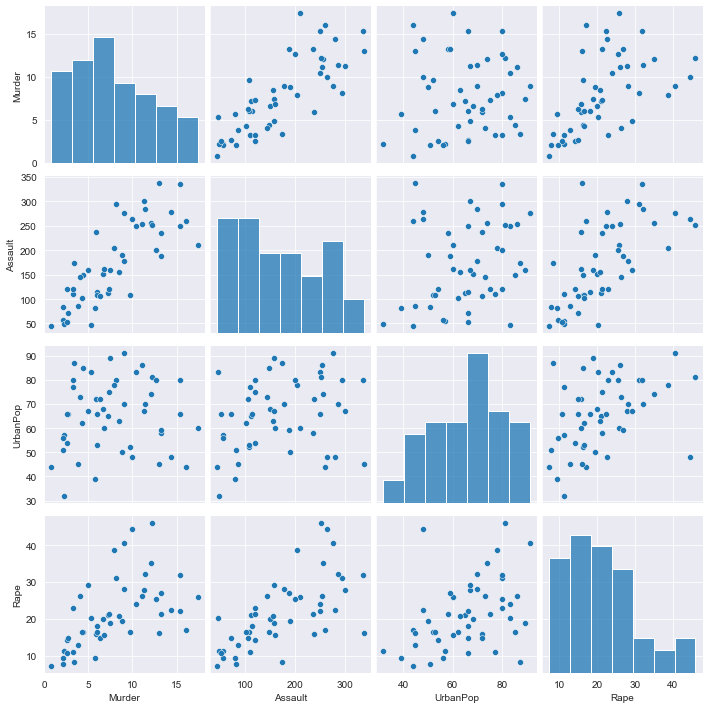

In [61]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(Crime)

In [66]:
Crime.drop(Crime.columns[[0]], axis = 1, inplace = True)

In [67]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Crime_df = scaler.fit_transform(Crime.iloc[:,1:])

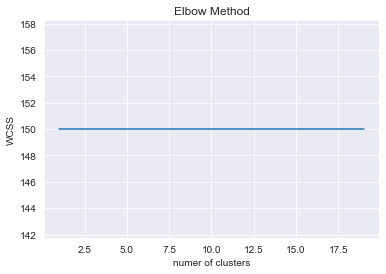

In [77]:
wcss =[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=1,random_state=0)
    kmeans.fit(scaled_Crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('numer of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
# build Cluster
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Crime_df)

KMeans(n_clusters=4, random_state=42)

In [70]:
clusters_new.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 0, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0,
       1, 0, 0, 1, 1, 0])

In [71]:
Crime['clusterid_new']= clusters_new.labels_

In [72]:
clusters_new.cluster_centers_

array([[-0.31830274,  0.59039932, -0.16762087],
       [-1.11783581, -0.93954982, -0.97657842],
       [ 1.19960221,  0.74266221,  1.41426923],
       [ 0.88321132, -0.82279055,  0.01946669]])

In [73]:
Crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.233333,144.500000,74.000000,19.677778
1,1,3.600000,78.538462,52.076923,12.176923
2,2,10.809091,269.727273,76.181818,34.345455
3,3,13.937500,243.625000,53.750000,21.412500


In [74]:
Crime

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,3


# DBSCAN

In [78]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
Crime = pd.read_csv('crime_data.csv')
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [80]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [81]:
Crime.drop(['Unnamed: 0'],axis=1,inplace=True)

In [82]:
array=Crime.values

In [83]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [84]:
stscaler = StandardScaler().fit(array)
X= stscaler.transform(array)

In [85]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [86]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [87]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [88]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [89]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [91]:
pd.concat([Crime,cl], axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
